# Results of different #agent values

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

In [44]:
results = pd.read_csv('./agents_results.csv')
results = results.drop_duplicates(subset='damage')
results = results.groupby(['planner','num_agents'], as_index=False).mean()
results.head()

,planner,num_agents,num_robots,f,d,active_time,completion_time,planner_time,damage,num_disabled
0,IterativeAssignmentPlanner,50,10.0,2.0,5.0,116.770696,116.770696,0.035450,1959.724724,50.0
1,IterativeAssignmentPlanner,100,10.0,2.0,5.0,131.339478,131.339478,0.126311,5079.938996,100.0
2,IterativeAssignmentPlanner,200,10.0,2.0,5.0,166.620219,166.620219,0.471056,12812.733521,200.0
3,IterativeAssignmentPlanner,300,10.0,2.0,5.0,203.790126,203.790126,1.031426,22642.191358,300.0
4,IterativeAssignmentPlanner,400,10.0,2.0,5.0,230.887050,230.887050,1.820630,34267.022912,400.0


In [45]:
planners_names = ['StaticLinePlanner', 'TravelingLinePlanner','SeparateTravelingPlanner','IterativeAssignmentPlanner',
                  'ClusteringAssignmentPlanner']

planners_results = [results.loc[results['planner']==name] for name in planners_names]

## Experiments

* the world is 100X300
* agents initialized in the bottom 100X100 square
* robots initialized somewhere under the world
* robots num is sufficient for full-blockage
* disablement range is 5
* agent speed v is 1
* robot speed fv is 2

3 2 1
3 2 2
3 2 3
3 2 4
3 2 5


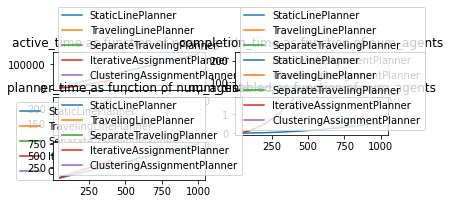

In [46]:
Y = ['damage', 'active_time', 'completion_time', 'planner_time', 'num_disabled']
X = ['num_agents' for y in Y]

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.title(f'{y} as function of {x}')
    plt.subplot(5, 2, i+1)
    print(3, 2, i+1)
    for r in planners_results:
        plt.plot(list(r[x]),list(r[y]))

    plt.legend(planners_names)

plt.show()

### damage as function of #agents

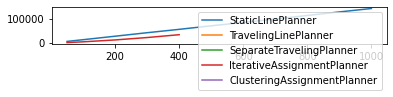

In [47]:
title = 'damage as function of #agents'
plt.title(title)
plt.xlabel('#agents')
plt.ylabel('damage')

plt.subplot(511)

for r in planners_results:
    plt.plot(list(r['num_agents']),list(r['damage']))

plt.legend(planners_names)
# plt.savefig('./plots/'+title+'.png')
plt.show()


### active time as function of #agents

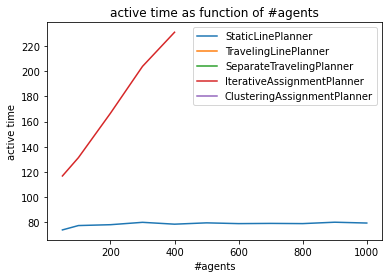

In [48]:
title = 'active time as function of #agents'
plt.title(title)
plt.xlabel('#agents')
plt.ylabel('active time')

for r in planners_results:
    plt.plot(list(r['num_agents']),list(r['active_time']))

plt.legend(planners_names)
# plt.savefig('./plots/'+title+'.png')
plt.show()


### planner time as function of #agents

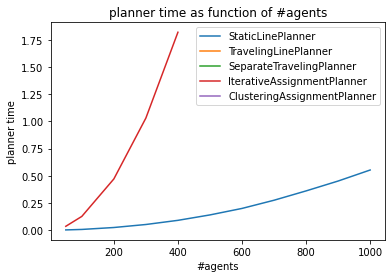

In [49]:
title = 'planner time as function of #agents'
plt.title(title)
plt.xlabel('#agents')
plt.ylabel('planner time')

for r in planners_results:
    plt.plot(list(r['num_agents']),list(r['planner_time']))

plt.legend(planners_names)
# plt.savefig('./plots/'+title+'.png')
plt.show()


### #disabled as function of #agents

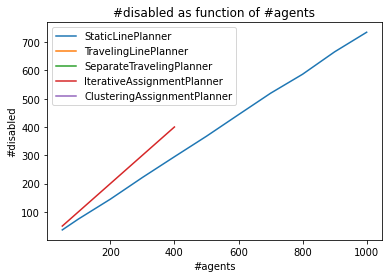

In [50]:
title = '#disabled as function of #agents'
plt.title(title)
plt.xlabel('#agents')
plt.ylabel('#disabled')

for r in planners_results:
    plt.plot(list(r['num_agents']),list(r['num_disabled']))

plt.legend(planners_names)
# plt.savefig('./plots/'+title+'.png')
plt.show()



